In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loans = pd.read_csv('file:\\Users\Auguste\Desktop\data analytics\EDA\loans_2007.csv')

# 4. Prints a histogram for loan amount

Text(0.5, 1.0, 'Histogram for loan amount')

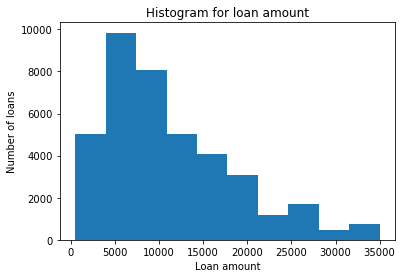

In [144]:
fig, ax = plt.subplots()
ax.hist(loans['loan_amnt'])
ax.set_xlabel('Loan amount')
ax.set_ylabel('Number of loans')
ax.set_title('Histogram for loan amount')

# 5. Print a bar chart with sum of loan amount per purpose

In [107]:
#Crete purpose and repayment term columns in the table:
loans['purpose'] = loans.filter(regex='purpose').eq(1).apply(lambda x: ', '.join(x[x].index), axis = 1).str[8:]
loans['repayment'] = loans.filter(regex='term_').eq(1).apply(lambda x: ', '.join(x[x].index), axis = 1).str[5:8]
#Crete separate table with amount, purpose and repayment term columns for later use
loan_purpose=loans[['loan_amnt','purpose', 'repayment']]
loan_purpose

,loan_amnt,purpose,repayment
0,5000.0,credit_card,36
1,2500.0,car,60
2,2400.0,small_business,36
3,10000.0,other,36
4,5000.0,wedding,36
...,...,...,...
39247,2500.0,home_improvement,36
39248,8500.0,credit_card,36
39249,5000.0,debt_consolidation,36
39250,5000.0,other,36


Text(0.5, 1.0, 'Sum of Loan Amount per Purpose')

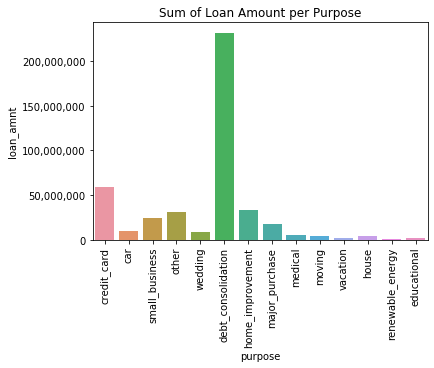

In [151]:
fig, ax = plt.subplots()
ax = sns.barplot(x='purpose', y='loan_amnt', data=loans, estimator=sum, ci=None)
plt.xticks(rotation=90)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set_title('Sum of Loan Amount per Purpose')

# 6. Print a boxplot for loan amount, print median + min + max + Q1+ Q3 + outliers and comment your findings

Text(0.5, 1.0, 'Boxplot for Loan Amount')

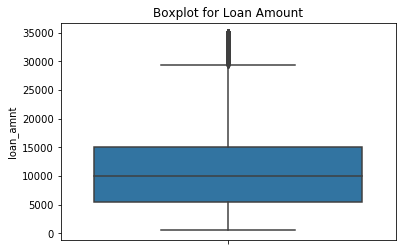

In [153]:
#print a boxplot for loan amount
sns.boxplot(y=loans['loan_amnt']).set_title('Boxplot for Loan Amount')

In [109]:
#Print median + min + max + Q1+ Q3
print('median, min, max, Q1, Q3: \n', loans['loan_amnt'].describe()[['50%', 'min', 'max', '25%', '75%']])

#find outliers
Q1 = loans['loan_amnt'].quantile(0.25)
Q3 = loans['loan_amnt'].quantile(0.75)
IQR = Q3 - Q1
outliers = loans['loan_amnt'][(loans['loan_amnt'] < (Q1 - 1.5 * IQR)) | (loans['loan_amnt'] > (Q3 + 1.5 * IQR))]
print('\n Outliers:\n', outliers)

median, min, max, Q1, Q3: 
 50%    10000.0
min      500.0
max    35000.0
25%     5400.0
75%    15000.0
Name: loan_amnt, dtype: float64

 Outliers:
 30       31825.0
77       35000.0
122      35000.0
179      35000.0
203      29500.0
          ...   
19330    32000.0
19341    32000.0
19355    30000.0
19368    30000.0
19387    35000.0
Name: loan_amnt, Length: 1154, dtype: float64


50% of values are between 5400.0 and 15000.0. There are 1154 outliers that are higher than Q3 + 1.5 * IQR (Interquartile Range)

# 7. Print scatter plot for loans (y-axis for loans amount, x-axis for loan repayment term, color for purpose)

Text(0, 0.5, 'Loan amount')

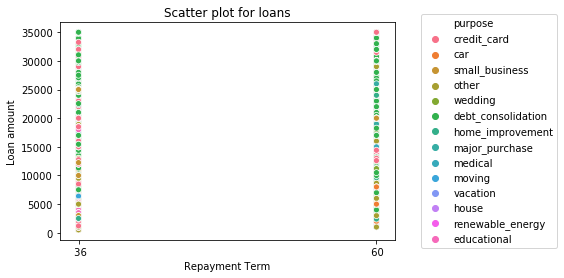

In [154]:
ax = sns.scatterplot(x=loan_purpose['repayment'], y=loan_purpose['loan_amnt'], hue = loan_purpose['purpose'])
ax.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), ncol=1)
ax.set_title('Scatter plot for loans')
ax.set_xlabel('Repayment Term')
ax.set_ylabel('Loan amount')